<a href="https://colab.research.google.com/github/michaelg3709/FastAI-notebooks/blob/main/FastAI_Lesson2_Model_to_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/fastai/fastbook/blob/master/02_production.ipynb

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Aug  3 14:07:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!pip install -Uqq fastbook
!pip install jmd_imagescraper

import fastbook  #import the fast.ai library
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *

from pathlib import Path

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from jmd_imagescraper.imagecleaner import *

In [4]:
bear_types = ['grizzly','black','teddy']
path = Path().cwd()/"bear_images" #assigns path to current working directory

In [5]:
duckduckgo_search(path,"grizzly","grizzly_bear",max_results=100) #downloads 100 images of 'cats' and saves it in path/grizzly

Duckduckgo search: grizzly_bear


[Path('/content/bear_images/grizzly/001_8ded30c6.jpg'),
 Path('/content/bear_images/grizzly/002_511e554c.jpg'),
 Path('/content/bear_images/grizzly/003_9da51fcf.jpg'),
 Path('/content/bear_images/grizzly/004_8c37606b.jpg'),
 Path('/content/bear_images/grizzly/005_d1beafe1.jpg'),
 Path('/content/bear_images/grizzly/006_9e356264.jpg'),
 Path('/content/bear_images/grizzly/007_b2054723.jpg'),
 Path('/content/bear_images/grizzly/008_9072a96a.jpg'),
 Path('/content/bear_images/grizzly/009_4c13d4bd.jpg'),
 Path('/content/bear_images/grizzly/010_0bdfa5a1.jpg'),
 Path('/content/bear_images/grizzly/011_b02b1957.jpg'),
 Path('/content/bear_images/grizzly/012_6d9a3d3e.jpg'),
 Path('/content/bear_images/grizzly/013_26eaf8a4.jpg'),
 Path('/content/bear_images/grizzly/014_293ce704.jpg'),
 Path('/content/bear_images/grizzly/015_b3b2832e.jpg'),
 Path('/content/bear_images/grizzly/016_0f95941f.jpg'),
 Path('/content/bear_images/grizzly/017_f4a0754d.jpg'),
 Path('/content/bear_images/grizzly/018_a0bd69b2

In [6]:
duckduckgo_search(path,"black","black_bear",max_results=100) #downloads 100 images of 'cats' and saves it in path/black

Duckduckgo search: black_bear


[Path('/content/bear_images/black/001_2750506a.jpg'),
 Path('/content/bear_images/black/002_fda43b43.jpg'),
 Path('/content/bear_images/black/003_cc7b8b85.jpg'),
 Path('/content/bear_images/black/004_9a0bef92.jpg'),
 Path('/content/bear_images/black/005_d8ba870e.jpg'),
 Path('/content/bear_images/black/006_55ae7af3.jpg'),
 Path('/content/bear_images/black/007_7a4dc565.jpg'),
 Path('/content/bear_images/black/008_10c7f6a7.jpg'),
 Path('/content/bear_images/black/009_de0979b8.jpg'),
 Path('/content/bear_images/black/010_7771e74c.jpg'),
 Path('/content/bear_images/black/011_5dd6e20c.jpg'),
 Path('/content/bear_images/black/012_11886b09.jpg'),
 Path('/content/bear_images/black/013_4979ad57.jpg'),
 Path('/content/bear_images/black/014_74f95380.jpg'),
 Path('/content/bear_images/black/015_ed679c2a.jpg'),
 Path('/content/bear_images/black/016_ae422356.jpg'),
 Path('/content/bear_images/black/017_5ecae984.jpg'),
 Path('/content/bear_images/black/018_30750990.jpg'),
 Path('/content/bear_images/

In [7]:
duckduckgo_search(path,"teddy","teddy_bear",max_results=100) #downloads 100 images of 'cats' and saves it in path/teddy

Duckduckgo search: teddy_bear


[Path('/content/bear_images/teddy/001_e4ea6e6e.jpg'),
 Path('/content/bear_images/teddy/002_ce4c8b27.jpg'),
 Path('/content/bear_images/teddy/003_d9f9d68c.jpg'),
 Path('/content/bear_images/teddy/004_041d65f7.jpg'),
 Path('/content/bear_images/teddy/005_07fe3fe9.jpg'),
 Path('/content/bear_images/teddy/006_1baf97af.jpg'),
 Path('/content/bear_images/teddy/007_87395601.jpg'),
 Path('/content/bear_images/teddy/008_3e75b5d9.jpg'),
 Path('/content/bear_images/teddy/009_44ee06ba.jpg'),
 Path('/content/bear_images/teddy/010_4ac549fd.jpg'),
 Path('/content/bear_images/teddy/011_d5622002.jpg'),
 Path('/content/bear_images/teddy/012_1c6c9a60.jpg'),
 Path('/content/bear_images/teddy/013_9f8905c8.jpg'),
 Path('/content/bear_images/teddy/014_62e88c28.jpg'),
 Path('/content/bear_images/teddy/015_fdb9b0cd.jpg'),
 Path('/content/bear_images/teddy/016_64fd9e13.jpg'),
 Path('/content/bear_images/teddy/017_47f2f3ba.jpg'),
 Path('/content/bear_images/teddy/018_28576dcb.jpg'),
 Path('/content/bear_images/

In [8]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [9]:
fns = get_image_files(path)
fns

(#300) [Path('/content/bear_images/grizzly/056_3ca4e0c4.jpg'),Path('/content/bear_images/grizzly/029_0d08a0e1.jpg'),Path('/content/bear_images/grizzly/035_a768f54a.jpg'),Path('/content/bear_images/grizzly/042_55b6253a.jpg'),Path('/content/bear_images/grizzly/049_535e9544.jpg'),Path('/content/bear_images/grizzly/006_9e356264.jpg'),Path('/content/bear_images/grizzly/054_059f6de0.jpg'),Path('/content/bear_images/grizzly/030_8daba5dc.jpg'),Path('/content/bear_images/grizzly/011_b02b1957.jpg'),Path('/content/bear_images/grizzly/015_b3b2832e.jpg')...]

In [10]:
failed=verify_images(fns) #looks for files that arent images
failed
failed.map(Path.unlink); #unlinks the failed files from the folder

In [14]:
# Create a Datablock object that sends the images to a DataLoaders class
bears=DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #specify types for the independent and dependent variables
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [15]:
# Create data loader
dls=bears.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


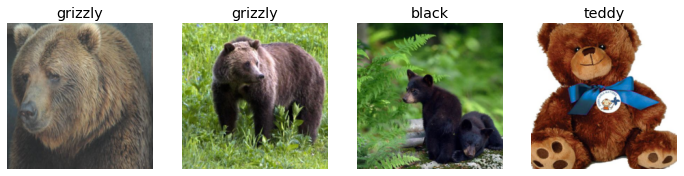

In [16]:
dls.valid.show_batch(max_n=4,nrows=1)

In [17]:
#Call for a Learner that learns based on the input images in 4 different training iterations or epochs.
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


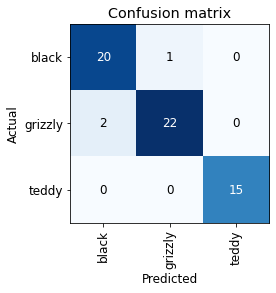

In [19]:
# Confusion matrix 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

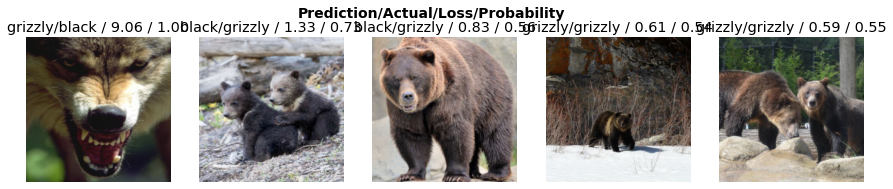

In [20]:
# Show images with highest loss in dataset
interp.plot_top_losses(5, nrows = 1)

In [21]:
# Data clean
cleaner = ImageClassifierCleaner(learn)
cleaner

### Use model for interference

In [25]:
# Export the model and upload new test image

learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')


In [27]:
# Click event handler
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# Create a run button
btn_run = widgets.Button(description='Classify')
btn_run.on_click(on_click_classify)

# Upload button
btn_upload = widgets.FileUpload()

# Vertical widget box to diplay buttons and output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])